By using Logistics Regression we are predicting the given person with certain attributes is diabetic or non diabetic



In [49]:
#importing all the required libraries to build this model

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [21]:
#Loading the dataset into the dataframe and by looking into the dataset it was observed that there are no column names 
#hence while loading data into dataframe, added column names by passing as list 

colnames=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=pd.read_table("C:\\Users\\abhis\\Downloads\\pima-indians-diabetes.data",delimiter=',', names=colnames)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#checking the shape of database
df.shape

(768, 9)

In [28]:
#as this data having two classses checking the count of each class

df.groupby(df['class']).count()

#It can be observed that there are less number of datapoints for diabetics patient, hence the model cannot be good at predicting the diabetic patentient
# because permutaions and combinations will be very less to predict class due to low datpoints

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [30]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
#checking for any null values 

df.isnull().sum()

#It can be obsreved that there are no null values 

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [40]:
# By observing the data there are few outliers, blood presuure cannot be zero 
# To findout the number of zeros 

num_of_zeros=(df==0).sum()
print(num_of_zeros)

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


In [42]:
#listing out median values 

df.median()

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [46]:
# Replacing zeros with median of their respctive columns beacuse the median is less affected by outliers compared to the mean.

df=df.apply(lambda x:x.replace(0,x.median()),axis=0)


In [47]:
zeros=(df==0).sum()
print(zeros)

preg       0
plas       0
pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    500
dtype: int64


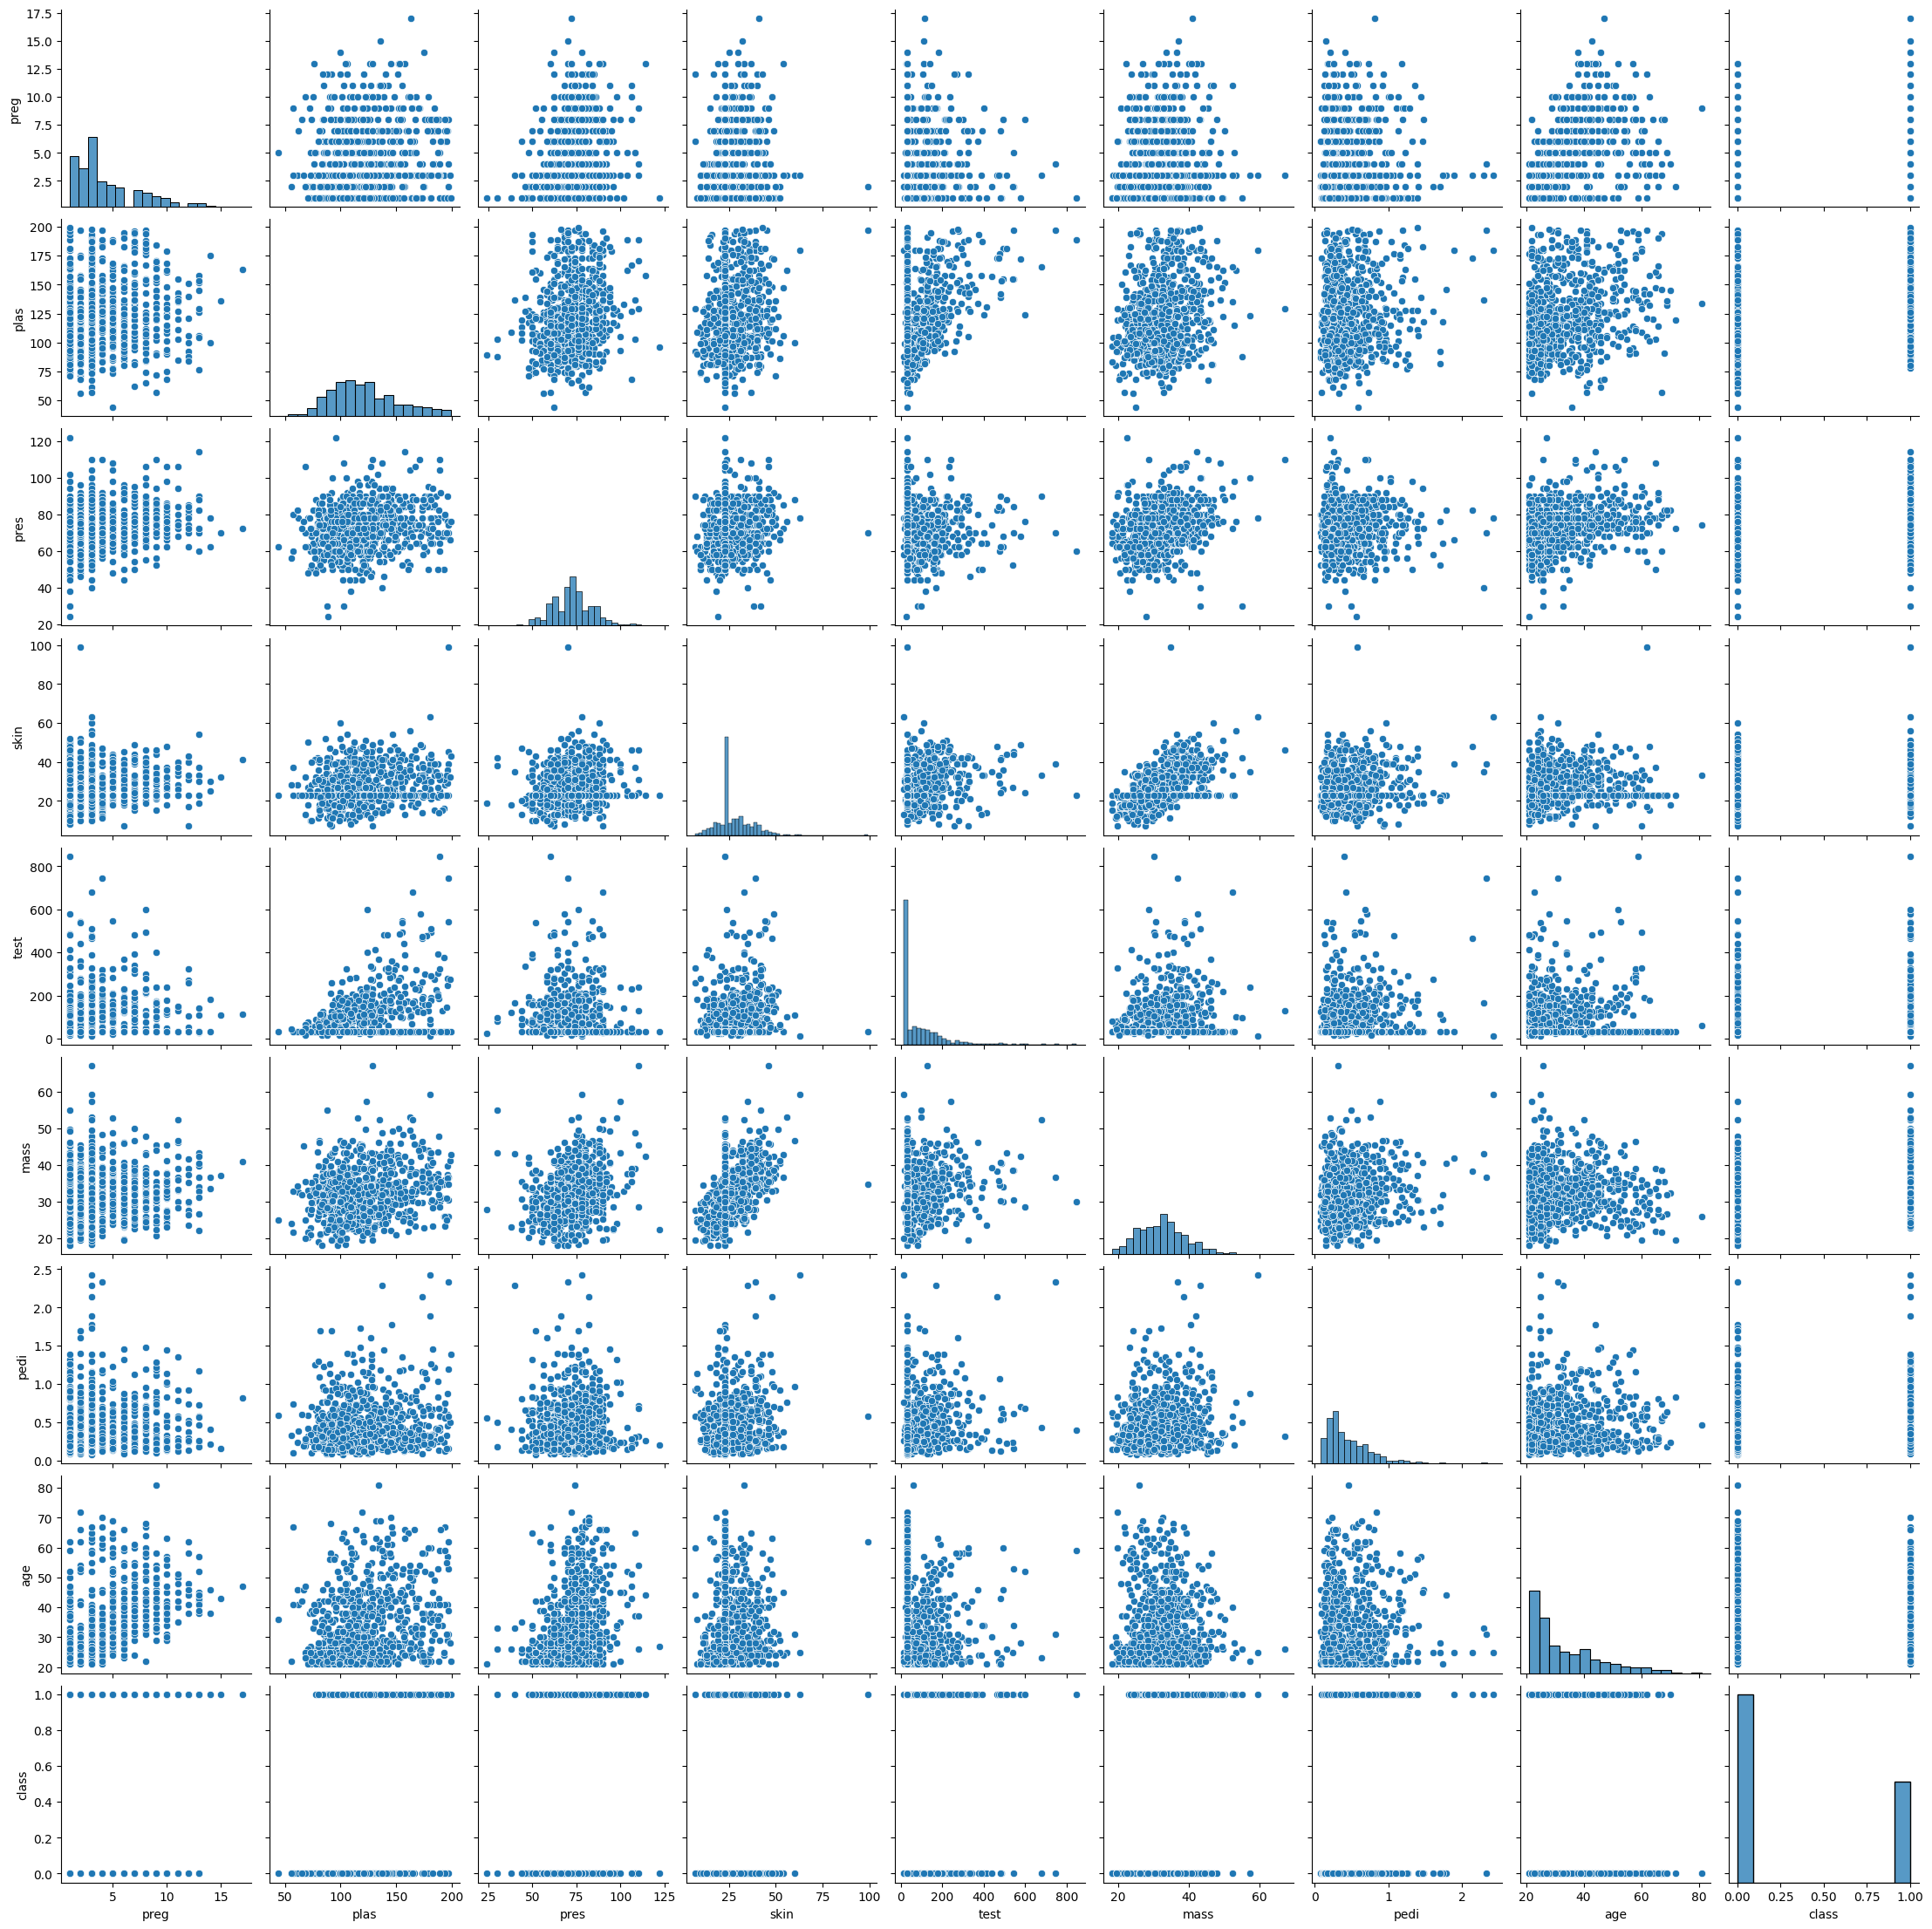

In [50]:
sns.pairplot(df)

In [52]:
df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Dataset has not outliers and null vales, now dataset is ready to feed into the algorithm 

In [69]:
#splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split 
X=df.iloc[:,0:8]
y=df.iloc[:,8]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [90]:
#To classify the diabetic and non-diabetic with the help of logistic Regression 

model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict=pd.DataFrame(y_predict)


C:\Users\abhis\PycharmProjects\wwk4\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
t=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

       preg      plas     pres      skin      test      mass      pedi  \
0  0.130342  0.033506 -0.01724 -0.012214 -0.001167  0.107289  1.017101   

        age  intercept  
0  0.015318  -8.250089  


Why do we need confusion matrix 

The confusion matrix is a crucial tool for evaluating the performance of classification models.
It provides a detailed breakdown of the model's predictions and the actual classes in a tabular format.

In [95]:
from sklearn import metrics
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7835497835497836
[[130  16]
 [ 34  51]]


Conclusion : The accuracy of the model is very low, as it is medical field, model accuracy should be more 99%
This model can perform better when there are more number of datapoints for diabetics pateients 